<a href="https://colab.research.google.com/github/PEkt/LabsAnalitic/blob/main/%D0%9F%D0%A04_3_%D0%9F%D0%BE%D0%BF%D0%BE%D0%B2%D0%B0_%D0%95_%D0%94_02_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_science_fiction_films'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

In [ ]:
df.head()

,Rank,Film,Worldwide gross,Year,Ref
0,1,Avatar,"$2,841,389,103",2009,[1]
1,2,Star Wars: The Force Awakens,"$2,068,223,624",2015,[2]
2,3,Jurassic World,"$1,670,516,444",2015,[3]
3,4,Star Wars: The Last Jedi,"$1,332,539,889",2017,[4]
4,5,Jurassic World: Fallen Kingdom,"$1,308,467,944",2018,[5]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Film             50 non-null     object
 2   Worldwide gross  50 non-null     object
 3   Year             50 non-null     int64 
 4   Ref              50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [ ]:
df['Worldwide gross']=df['Worldwide gross'].str.replace(r"US\$","").str.replace(r",","").str.replace(r"$","")

In [ ]:
df['Worldwide gross']=df['Worldwide gross'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Film             50 non-null     object
 2   Worldwide gross  50 non-null     int64 
 3   Year             50 non-null     int64 
 4   Ref              50 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [ ]:
df.drop(['Rank','Ref'],axis=1, inplace=True)


In [ ]:
df1=df[['Film', 'Worldwide gross']].sort_values(ascending=False, by='Worldwide gross')


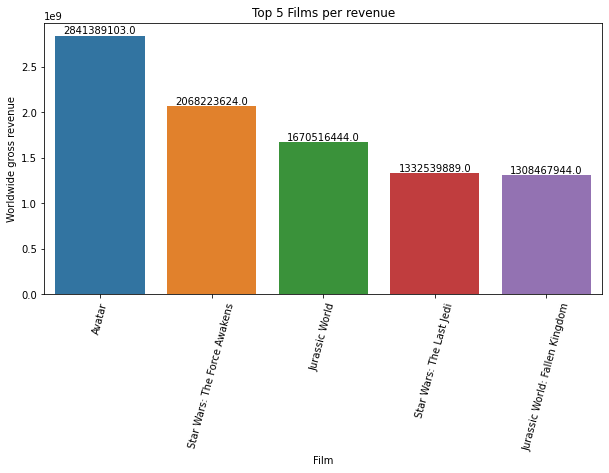

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Film',y='Worldwide gross', data=df1.head(5))
ax.set_xticklabels(labels=df1.head()['Film'],rotation=75)
ax.set_title("Top 5 Films per revenue")
ax.set_ylabel("Worldwide gross revenue")
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2, p.get_height()),ha='center',va='bottom')

Text(0, 0.5, ' ')

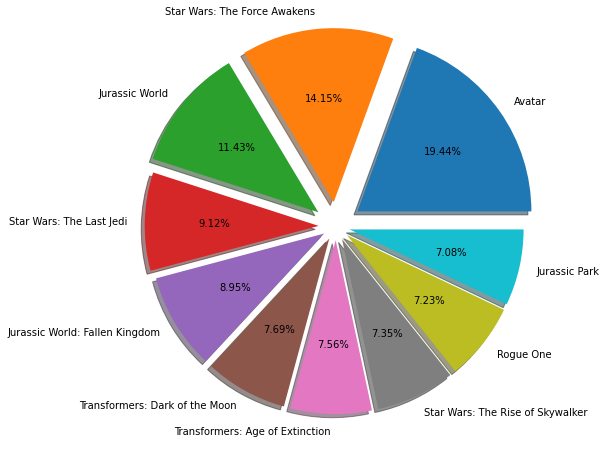

In [67]:
df1['Worldwide gross'].head(10).plot(kind='pie',autopct='%.2f%%',labels=df1['Film'],
                                     figsize=(8,8),shadow=True, 
                                     explode = (0.15, 0.14, 0.13, 0.1, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08))
plt.ylabel(' ')

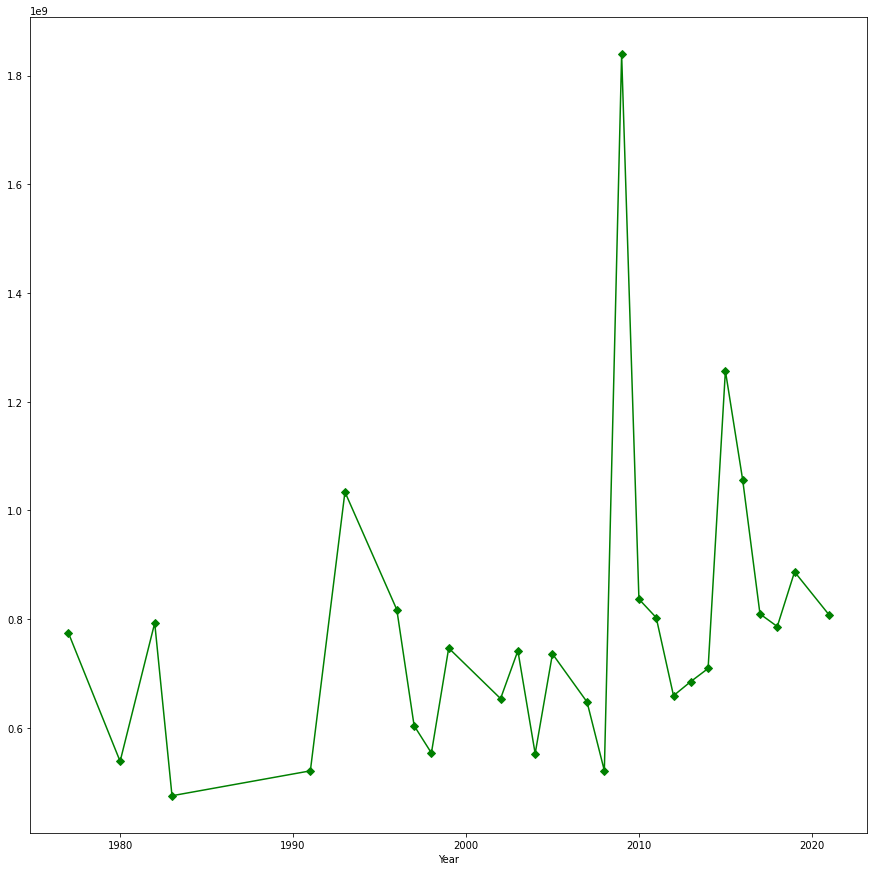

In [66]:
df2=df.groupby('Year')['Worldwide gross'].mean()
df2.plot(kind='line',figsize=(15,15), color="g", marker="D")


Подводя итог:
1. 3 наиболее прибыльных фильма в жанре научная фантастика : Avatar, Star Wars: The Force Awakens, Jurassic World
2. Самым прибыльным был 2010 год